# DS 3000 - Final Project

**Student Name**: Samy Fallah, Dhilan Panjabi, Ariel Park

**Date**: 12/06/2023


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Prepare Data

Prepare the data for analysis and perform a statistical summary on the variables price, neighborhood, room type.

In [2]:
# Load data into a dataframes
df_airbnb_2019 = pd.read_csv('2019AirBnB.csv') # file name
df_airbnb_2022 = pd.read_csv('2022Listings.csv') # file name
df_airbnb_2019.head() # view first five observations of 2019 data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df_airbnb_2022.head() # view first five observations of 2022 data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225,30,48,2019-11-04,0.31,3,308,0,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,2,2021-08-08,0.02,1,250,1,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,536,2022-05-09,3.37,1,172,62,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.76,1,0,0,NaN


In [4]:
# view more details for 2019 data
df_airbnb_2019.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [5]:
# view more details for 2022 data
df_airbnb_2022.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.741000e+04,37396,3.741000e+04,37344,37410,37410,37410.000000,37410.000000,37410,37410.000000,37410.000000,37410.000000,29461,29461.000000,37410.000000,37410.000000,37410.000000,4
unique,NaN,36165,NaN,9090,5,243,NaN,NaN,4,NaN,NaN,NaN,2576,NaN,NaN,NaN,NaN,4
top,NaN,Private bedroom -3 mins to shopping center,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-05-30,NaN,NaN,NaN,NaN,41662/AL
freq,NaN,33,NaN,391,15855,2594,NaN,NaN,21094,NaN,NaN,NaN,985,NaN,NaN,NaN,NaN,1
mean,6.100385e+16,NaN,1.237140e+08,NaN,NaN,NaN,40.729308,-73.946171,NaN,190.775221,19.763994,26.347875,NaN,1.166622,15.114782,119.704892,7.248142,NaN
std,1.806040e+17,NaN,1.382397e+08,NaN,NaN,NaN,0.058041,0.056701,NaN,342.491748,32.771327,55.060905,NaN,1.851005,50.717311,132.758373,18.315637,NaN
min,2.595000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.504560,-74.269520,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.470053e+07,NaN,1.293966e+07,NaN,NaN,NaN,40.688260,-73.983518,NaN,75.000000,2.000000,1.000000,NaN,0.130000,1.000000,0.000000,0.000000,NaN
50%,3.484341e+07,NaN,5.372558e+07,NaN,NaN,NaN,40.724885,-73.953794,NaN,125.000000,30.000000,5.000000,NaN,0.490000,1.000000,60.000000,0.000000,NaN
75%,5.018400e+07,NaN,2.093738e+08,NaN,NaN,NaN,40.763380,-73.926340,NaN,203.000000,30.000000,25.000000,NaN,1.640000,3.000000,254.000000,6.000000,NaN


In [6]:
# create 2 new dfs with only neighborhood_group, room_type, and price
df_2022 = df_airbnb_2022[['neighbourhood', 'room_type', 'price']] # select columns
df_2022.head() # view results

,neighbourhood,room_type,price
0,Midtown,Entire home/apt,225
1,Bedford-Stuyvesant,Private room,60
2,Sunset Park,Entire home/apt,275
3,Midtown,Private room,68
4,Upper West Side,Private room,75


In [7]:
# df for 2019 with only neighborhood_group, room_type, and price
df_2019 = df_airbnb_2019[['neighbourhood', 'room_type', 'price']] # select columns
df_2019.head() # view results

,neighbourhood,room_type,price
0,Kensington,Private room,149
1,Midtown,Entire home/apt,225
2,Harlem,Private room,150
3,Clinton Hill,Entire home/apt,89
4,East Harlem,Entire home/apt,80


In [8]:
# change the categorical data into numerical data types 2022
df_2022['neighbourhood'] = df_2022['neighbourhood'].astype('category').cat.codes # change neighborhood_group
df_2022['room_type'] = df_2022['room_type'].astype('category').cat.codes # change room_type

# numerical cleanup
df_2022['price'] = df_2022['price'].apply(lambda x: x if x > 0 else 0) # replace negative prices with 0

df_2022.head() # view results

/var/folders/mh/dcx3w66s39ggkgwxynkqfhmm0000gn/T/ipykernel_25729/4114637546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['neighbourhood'] = df_2022['neighbourhood'].astype('category').cat.codes # change neighborhood_group
/var/folders/mh/dcx3w66s39ggkgwxynkqfhmm0000gn/T/ipykernel_25729/4114637546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['room_type'] = df_2022['room_type'].astype('category').cat.codes # change room_type
/var/folders/mh/dcx3w66s39ggkgwxynkqfhmm0000gn/T/ipyker

,neighbourhood,room_type,price
0,142,0,225
1,12,2,60
2,211,0,275
3,142,2,68
4,223,2,75


In [9]:
# change the categorical data into numerical data types 2019
df_2019['neighbourhood'] = df_2019['neighbourhood'].astype('category').cat.codes # change neighborhood_group
df_2019['room_type'] = df_2019['room_type'].astype('category').cat.codes # change room_type

df_2019.head() # view results

/var/folders/mh/dcx3w66s39ggkgwxynkqfhmm0000gn/T/ipykernel_25729/770751283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['neighbourhood'] = df_2019['neighbourhood'].astype('category').cat.codes # change neighborhood_group
/var/folders/mh/dcx3w66s39ggkgwxynkqfhmm0000gn/T/ipykernel_25729/770751283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['room_type'] = df_2019['room_type'].astype('category').cat.codes # change room_type


,neighbourhood,room_type,price
0,108,1,149
1,127,0,225
2,94,1,150
3,41,0,89
4,61,0,80


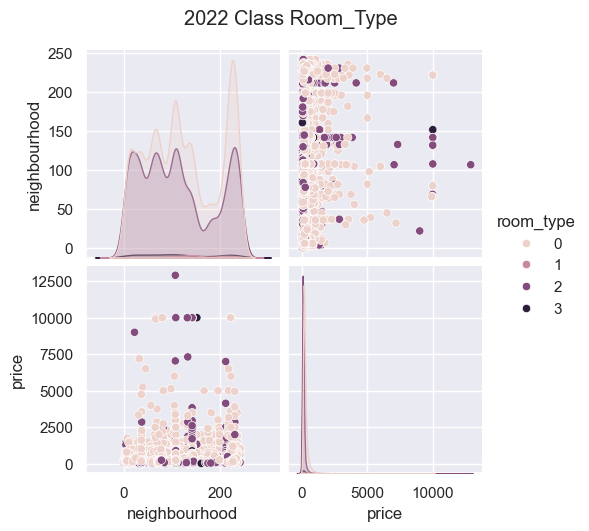

In [10]:
sns.pairplot(df_2022, hue="room_type").fig.suptitle('2022 Class Room_Type', y=1.05)
plt.show()

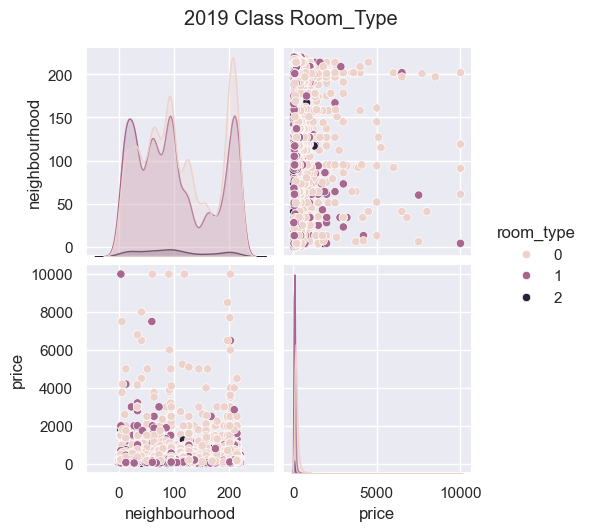

In [11]:
sns.pairplot(df_2019, hue="room_type").fig.suptitle('2019 Class Room_Type', y=1.05)
plt.show()

In [12]:
# create correlation matrix 2022
corr_matrix_2022 = df_2022.corr()
corr_matrix_2022

,neighbourhood,room_type,price
neighbourhood,1.000000,-0.070751,0.060914
room_type,-0.070751,1.000000,-0.178687
price,0.060914,-0.178687,1.000000


In [13]:
# create correlation matrix 2019
corr_matrix_2019 = df_2019.corr()
corr_matrix_2019

,neighbourhood,room_type,price
neighbourhood,1.000000,-0.071964,0.062057
room_type,-0.071964,1.000000,-0.249350
price,0.062057,-0.249350,1.000000


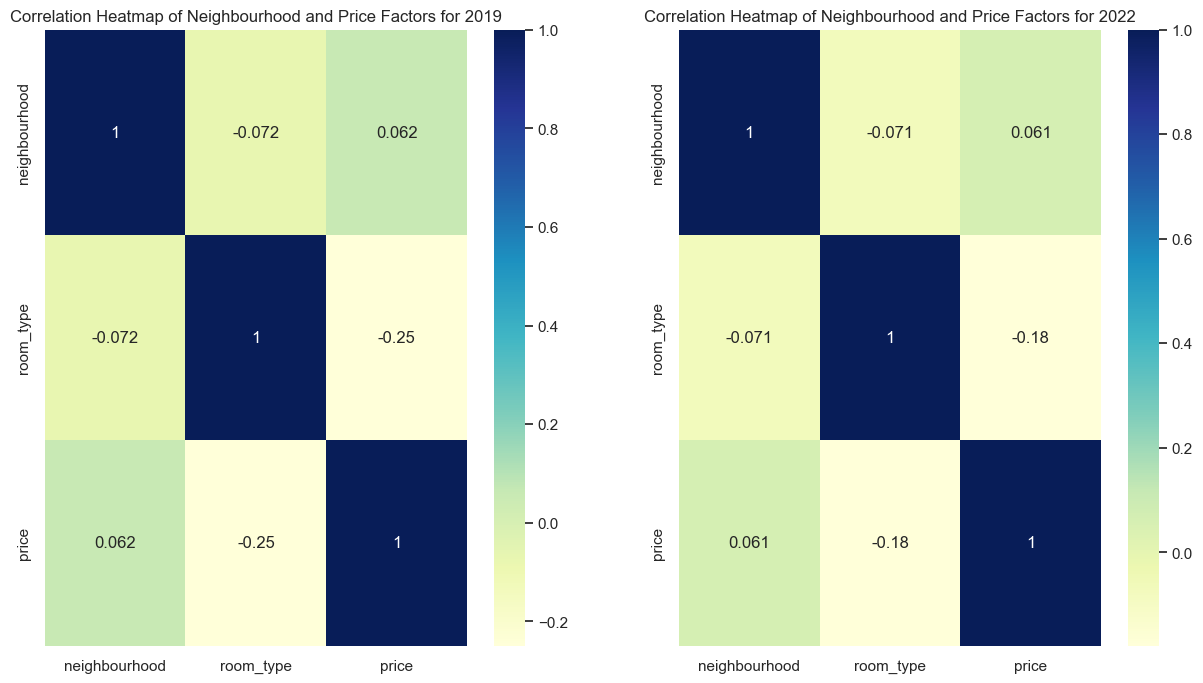

In [15]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
heatmap_2019 = sns.heatmap(corr_matrix_2019, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Neighbourhood and Price Factors for 2019')

plt.subplot(1, 2, 2)
heatmap_2022 = sns.heatmap(corr_matrix_2022, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Neighbourhood and Price Factors for 2022')

plt.show()

In [14]:
# sns.pairplot(df_airbnb_2022, hue="neighbourhood").fig.suptitle('Distribution and Pairwise Relationships between Iris Features', y=1.05)
# plt.show()

## Question 2: 
TODO: Copy/Paste the instructions for this question.


In [16]:
#Write your python code to answer question 2. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.



## Data Preparation and Exploratory Data Analysis (EDA)

This section includes more comprehensive data loading, cleaning, and exploratory data analysis (EDA). We will handle missing values, visualize key features, and prepare the datasets for further analysis and modeling.



## Feature Engineering

In this section, we will extract and transform features as necessary to prepare our data for machine learning modeling.



## Machine Learning Model Implementation and Experimentation

We will implement and experiment with three machine learning algorithms: Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forests. The models will be evaluated using suitable metrics such as precision, recall, and accuracy for classification; and MSE, R2, etc., for regression.



## Hyper-parameter Tuning

This section will include the tuning of hyper-parameters for the SVM, KNN, and Random Forest models to optimize their performance.



## Documentation and Visualization

The code will be well documented with markdown cells and comments. All visualizations will have appropriate titles and labeled axes to ensure clarity and readability.
